In [3]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from astropy.table import Table as tbl
from astropy.table import vstack
from sklearn import preprocessing as pp
%matplotlib inline

In [ ]:
def lightcurve(source, periods):        #source--the raw lightcurve, period--freq1_freq from cesium.featurize
    nOid = np.unique(source['oid'])
    
    fig = plt.figure(figsize = (20, 15))   #Not 100% necessary
    
    #If true, then we uploaded a positional query
    for i in range(len(nOid)):
        want = np.where(source['oid'] == nOid[i])

        if (source['fid'][want][0] == 1):
            cmap = plt.cm.Greens_r
            filt = 'green filter'
        elif (source['fid'][want][0] == 2):
            cmap = plt.cm.Reds_r
            filt = 'Red filter'
        
        ax = plt.subplot2grid((4*len(nOid), 3), (3*i,0), colspan = 1)
        ax.scatter(source[want]['obsmjd'], source[want]['mag_autocorr'], c = cmap(source[want]['magerr_auto']), edgecolor = 'k', linewidths = .75)
        ax.errorbar(source[want]['obsmjd'], source[want]['mag_autocorr'], yerr = source[want]['magerr_auto'], fmt = 'none', c = cmap(source[want]['magerr_auto']), markersize = 5, label = 'Overall source curve', mec = 'k', mew = 3)
        ax.set_ylabel('Magnitude')
        ax.set_xlabel('Time')
        ax.set_title('Total lightcurve of {0}'.format(nOid[i]))
        ax.set_ylim(np.max(source[want]['mag_autocorr'] + source[want]['magerr_auto'])+0.1, np.min(source[want]['mag_autocorr'] - source[want]['magerr_auto'])-0.1)


        ax1 = plt.subplot2grid((4*len(nOid), 3), ((3*i + 1),0), rowspan = 1, colspan = 1)
        ax1.scatter((source[want]['obsmjd']/periods[i])%1, source[want]['mag_autocorr'], c = cmap(source[want]['magerr_auto']), edgecolor = 'k', linewidths = .75)
        ax1.errorbar((source[want]['obsmjd']/periods[i])%1, source[want]['mag_autocorr'], yerr = source[want]['magerr_auto'], fmt = 'none', c = cmap(source[want]['magerr_auto']), markersize = 3, label = filt, mec = 'k', mew = 3)
        ax1.set_ylabel('Magnitude')
        ax1.set_xlabel('Phase')
        ax1.set_title('Folded lightcurve of {0} in {1}'.format(nOid[i], filt))
        ax1.set_ylim(np.max(source[want]['mag_autocorr'] + source[want]['magerr_auto'])+0.1, np.min(source[want]['mag_autocorr'] - source[want]['magerr_auto'])-0.1)
        
    plt.tight_layout()

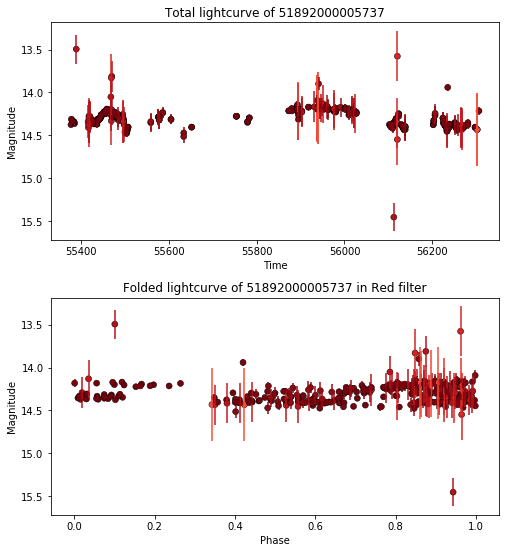

In [69]:
test = tbl.read('scripts/ptf_query/byOid/curves_oid___51892000005737.tbl', format = 'ipac')
mask = np.where(test['mag_autocorr'] > 0)
period = [1.00156182622]

lightcurve(test[mask], period)

In [ ]:
stest = np.sort(test[mask], order = 'magerr_auto')

lightcurve(stest, period)

In [5]:
test = tbl.read('scripts/ptf_query/byOid/curves_oid___51892000005737.tbl', format = 'ipac')
mask = np.where(test['mag_autocorr'] > 0)[0][0:200]

0.07032
0.0809431751292


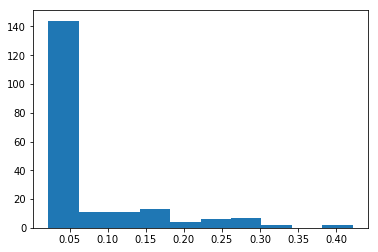

In [13]:
plt.hist(test[mask]['magerr_auto'])
print(np.mean(test[mask]['magerr_auto']))
print(np.std(test[mask]['magerr_auto']))

(15.715999999999999, 13.185)

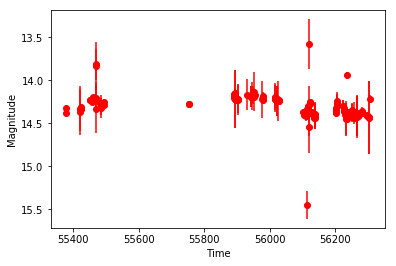

In [34]:
plt.errorbar(test[mask]['obsmjd'], test[mask]['mag_autocorr'], yerr = test[mask]['magerr_auto'], fmt = 'ro')
plt.ylabel('Magnitude')
plt.xlabel('Time')
plt.ylim(np.max(test[mask]['mag_autocorr']+ test[mask]['magerr_auto'])+0.1, np.min(test[mask]['mag_autocorr']-test[mask]['magerr_auto'])-0.1)


(15.552999999999999, 13.478)

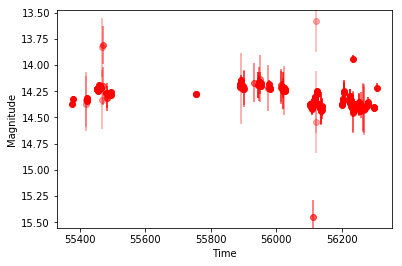

In [29]:
alphas = [1 - (err - np.min(test[mask]['magerr_auto']))/(np.max(test[mask]['magerr_auto']) - np.min(test[mask]['magerr_auto'])) for err in test[mask]['magerr_auto']]
colors = np.asarray([(1,0,0, alpha) for alpha in alphas])

for x, y, yerr, color in zip(test[mask]['obsmjd'], test[mask]['mag_autocorr'], test[mask]['magerr_auto'], colors):
    plt.errorbar(x, y, yerr = yerr, fmt = 'o', color = color)
    
plt.ylabel('Magnitude')
plt.xlabel('Time')
plt.ylim(np.max(test[mask]['mag_autocorr'])+0.1, np.min(test[mask]['mag_autocorr'])-0.1)

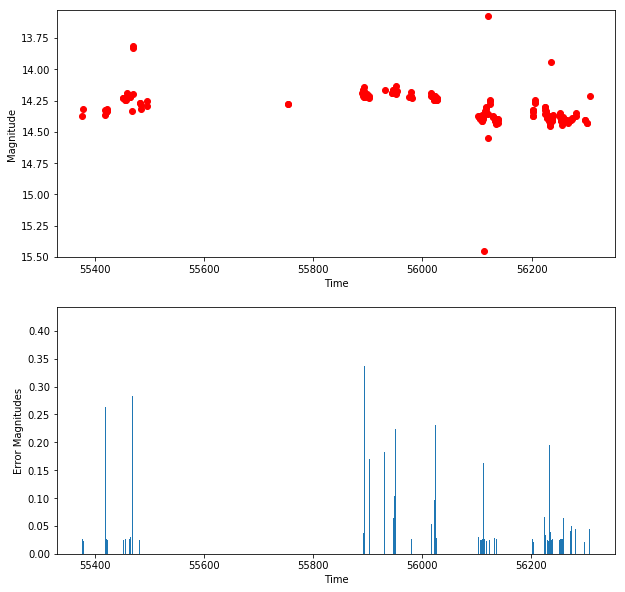

In [9]:
fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(211)
ax.scatter(test[mask]['obsmjd'], test[mask]['mag_autocorr'], marker = 'o', c = 'r')
ax.set_ylabel('Magnitude')
ax.set_xlabel('Time')
ax.set_ylim(np.max(test[mask]['mag_autocorr'])+0.05, np.min(test[mask]['mag_autocorr'])-0.05)

ax1 = fig.add_subplot(212)
ax1.bar(test[mask]['obsmjd'], test[mask]['magerr_auto'])
ax1.set_ylabel('Error Magnitudes')
ax1.set_xlabel('Time')

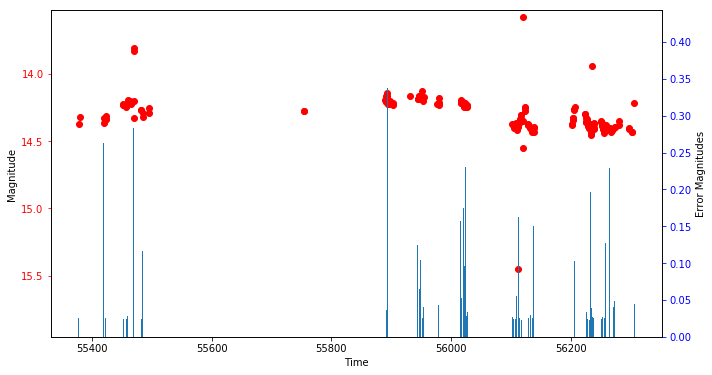

In [10]:
fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(211)
ax.scatter(test[mask]['obsmjd'], test[mask]['mag_autocorr'], marker = 'o', c = 'r')
ax.tick_params('y', colors = 'r')
ax.set_ylabel('Magnitude')
ax.set_xlabel('Time')
ax.set_ylim(np.max(test[mask]['mag_autocorr'])+0.5, np.min(test[mask]['mag_autocorr']-.05))

ax1 = ax.twinx()
ax1.bar(test[mask]['obsmjd'], test[mask]['magerr_auto'])
ax1.tick_params('y', colors = 'b')
ax1.set_ylabel('Error Magnitudes')
ax1.set_xlabel('Time')

fig.tight_layout()

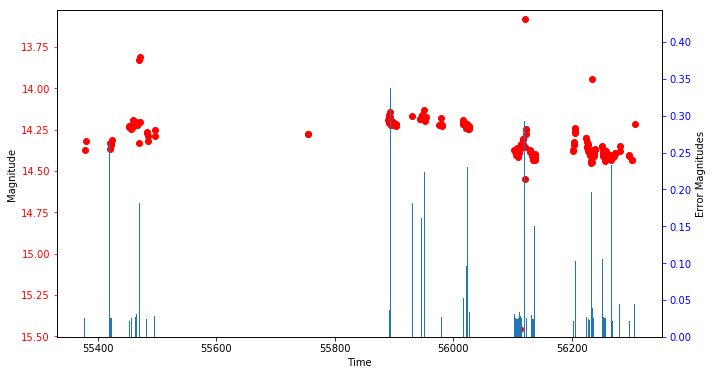

In [11]:
fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(211)
ax.scatter(test[mask]['obsmjd'], test[mask]['mag_autocorr'], marker = 'o', c = 'r')
ax.tick_params('y', colors = 'r')
ax.set_ylabel('Magnitude')
ax.set_xlabel('Time')
ax.set_ylim(np.max(test[mask]['mag_autocorr'])+0.05, np.min(test[mask]['mag_autocorr']-.05))

ax1 = ax.twinx()
ax1.bar(test[mask]['obsmjd'], test[mask]['magerr_auto'])
ax1.tick_params('y', colors = 'b')
ax1.set_ylabel('Error Magnitudes')
ax1.set_xlabel('Time')

fig.tight_layout()

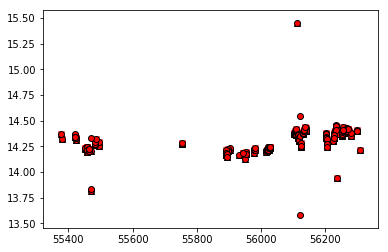

In [27]:
std = np.std(test[mask]['magerr_auto'])
mean = np.mean(test[mask]['magerr_auto'])

mask1 = np.where(test[mask]['magerr_auto'] < mean + std)
plt.scatter(test[mask]['obsmjd'][mask1], test[mask]['mag_autocorr'][mask1], marker = 'x', c = 'r', edgecolor = 'k')

mask2 = np.where(test[mask]['magerr_auto'] < mean + 2 * std)
plt.scatter(test[mask]['obsmjd'][mask2], test[mask]['mag_autocorr'][mask2], marker = '^', c = 'r', edgecolor = 'k')

mask3 = np.where(test[mask]['magerr_auto'] < mean + 3 * std)
plt.scatter(test[mask]['obsmjd'][mask3], test[mask]['mag_autocorr'][mask3], marker = 'o', c = 'r', edgecolor = 'k')

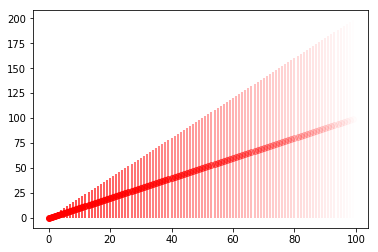

In [12]:

x = np.arange(0,100)
y = x
yerr = x

alphas = [1 - (err - np.min(yerr))/(100) for err in yerr]
colors = np.asarray([(1,0,0, alpha) for alpha in alphas])

for pos, ypos, yerr, color in zip(x,y,yerr,colors):
    plt.errorbar(pos, ypos, yerr = yerr, fmt = 'o', color = color)


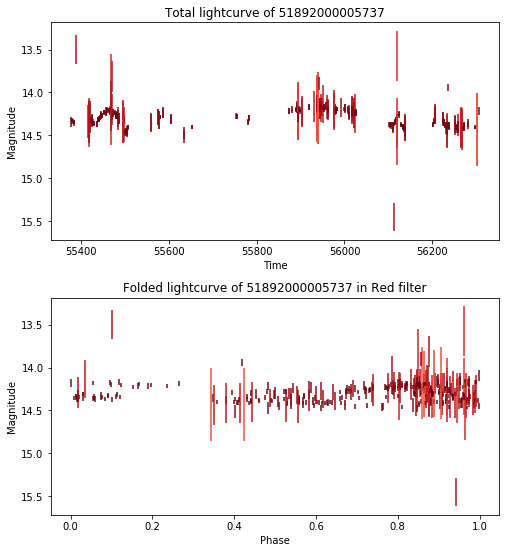

In [44]:
test = tbl.read('scripts/ptf_query/byOid/curves_oid___51892000005737.tbl', format = 'ipac')
mask = np.where(test['mag_autocorr'] > 0)
period = [1.00156182622]

lightcurve(test[mask], period)

Plot without error bars. Darker colors represent smaller errors. Not sure if error bars would be a helpful addition here or not. Currently, struggling to figure out a way to change the errorbars according to their size. This plot isnt phase folded but so far none of these are variable.

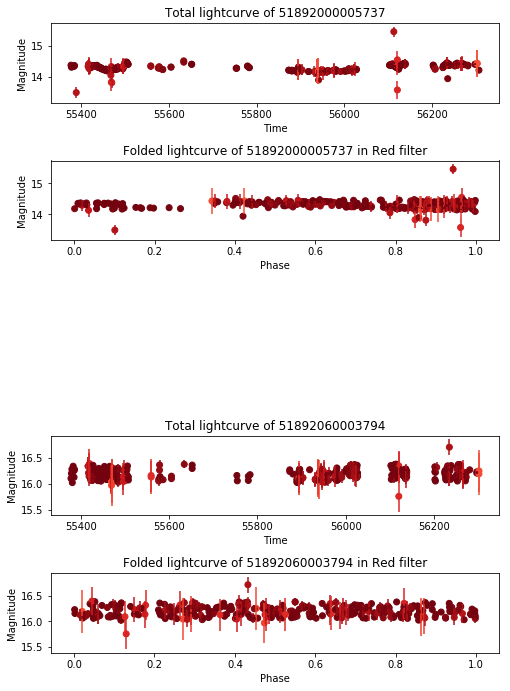

In [55]:
test2 = tbl.read('scripts/ptf_query/byOid/curves_oid___51892060003794.tbl', format = 'ipac')
test3 = vstack([test, test2])
mask3 = np.where(test3['mag_autocorr'] > 0)
periods = [1.00156182622, 0.0566304253118]
lightcurve(test3[mask3], periods)